## Multi-Commodity Network-Flow model: constraint-style LP with Python/Gurobi
## [Jon Lee](https://sites.google.com/site/jonleewebpage/home), 02/2020


\begin{align*}
\min~& \sum_{k=1}^{K} \sum_{e \in \mathcal{A}} c^k_e x^k_e \\
&\sum_{e\in \mathcal{A} ~:~ t(e)=v} x^k_e - \sum_{e\in \mathcal{A} ~:~ h(e)=v} x^k_e 
= b^k_v,~ \mbox{ for } v \in \mathcal{N},~ k=1,2,\ldots,K;\\
& \sum_{k=0}^{K}  x^k_{e} \leq u_e,~ \mbox{ for } e \in \mathcal{A};\\
&  x^k_{e}\geq 0,~ \mbox{ for } e \in \mathcal{A},~ k=1,2,\ldots,K\\
\end{align*} 

Notes:
* K=1 is ordinary single-commodity network flow. Integer solutions for free when node-supplies and arc capacities are integer. 
* K=2 example below with integer data gives a fractional basic optimum. This example doesn't have any feasible integer flow at all.

References:
* Jon Lee, "A First Course in Linear Optimization", Fourth Edition (Version 4.0), Reex Press, 2013-20.

MIT License

Copyright (c) 2021 Jon Lee

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
%reset -f
import itertools
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import networkx as nx

class StopExecution(Exception):
    def _render_traceback_(self):
        pass

In [2]:
# parameters
solveLPOnly=True      # set False to solve as an IP

In [3]:
# # Some toy data: 1 commodity
# Supplies= {
# # node i: [supply commodity[1] ... supply commodity[K]],
#     1: [12.],
#     2: [6.],
#     3: [-2.],
#     4: [0.],
#     5: [-9.],
#     6: [-7.]}

# CapacityCosts = {
# # arc (i,j): [capacity, cost commodity[1] ... cost commodity[K]],
#     (1,2): [6., 2],
#     (1,3): [8., -5],
#     (2,4): [5., 3],
#     (2,5): [7., 12],
#     (3,5): [5., -9],
#     (4,5): [8., 2],
#     (4,6): [5., 0],
#     (5,6): [5., 4]}

# Some toy data: 2 commodities with a fractional LP basic optimum
Supplies= {
# node i: [supply commodity[1] ... supply commodity[K]],
    1: [1., 0.],
    2: [0., -1.],
    3: [0., 0.],
    4: [0., 0.],
    5: [0., 0.],
    6: [0., 0.],
    7: [0., 1.],
    8: [-1., 0.]}

CapacityCosts = {
# arc (i,j): [capacity, cost commodity[1] ... cost commodity[K]],
    (1,2): [1., 1, 1],
    (1,3): [1., 1, 1],
    (2,5): [1., 1, 1],
    (3,4): [1., 1, 1],
    (4,1): [1., 1, 1],
    (4,7): [1., 1, 1],
    (5,6): [1., 1, 1],
    (6,2): [1., 1, 1],
    (6,8): [1., 1, 1],
    (7,3): [1., 1, 1],
    (7,8): [1., 1, 1],
    (8,5): [1., 1, 1]}

In [4]:
Nodes=list(Supplies.keys()) # get node list from supply data
K=len(Supplies[Nodes[0]]) # get number of commodities from supply data
Commods=list(range(1,K+1)) # name the commodities 1,2,...,K
Arcs=list(CapacityCosts.keys()) # get arc list from Capacity/Cost data
# ArcsCrossCommods=list(itertools.product(Arcs,Commods)) # make cross product of Arcs and Commods for variable indexing

In [5]:
model = gp.Model()
if solveLPOnly==True:
    x = model.addVars(Arcs, Commods)                
else:
    x = model.addVars(Arcs, Commods, vtype=GRB.INTEGER)        
model.setObjective(sum(CapacityCosts[i,j][k]*x[i,j,k] for (i,j) in Arcs for k in Commods), GRB.MINIMIZE)
model.addConstrs(x.sum(i,j,'*') <= CapacityCosts[i,j][0] for (i,j) in Arcs)
model.addConstrs(
  x.sum(i,'*',k) - x.sum('*',i,k) == Supplies[i][k-1] for i in Nodes for k in Commods)

Using license file /Library/gurobi/gurobi.lic


{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (7, 1): <gurobi.Constr *Awaiting Model Update*>,
 (7, 2): <gurobi.Constr *Awaiting Model Update*>,
 (8, 1): <gurobi.Constr *Awaiting Model Update*>,
 (8, 2): <gurobi.Constr *Awaiting Model Update*>}

In [7]:
model.optimize()
if model.status != GRB.Status.OPTIMAL:
    print("***** Gurobi solve status:", model.status)
    print("***** This is a problem. Model does not have an optimal solution")
    raise StopExecution
print(" ")
print("***** Flows:")
for (i,j) in Arcs: 
    arcflow=""
    for k in Commods:
        arcflow += str(round(x[i,j,k].X,4))
        arcflow += "  "
    print("x[(",i,",",j,"), *]=", arcflow, "capacity:", CapacityCosts[i,j][0])

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 28 rows, 24 columns and 72 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]

Solved in 0 iterations and 0.13 seconds
Optimal objective  8.000000000e+00
 
***** Flows:
x[( 1 , 2 ), *]= 0.5  0.5   capacity: 1.0
x[( 1 , 3 ), *]= 0.5  0.0   capacity: 1.0
x[( 2 , 5 ), *]= 0.5  0.0   capacity: 1.0
x[( 3 , 4 ), *]= 0.5  0.5   capacity: 1.0
x[( 4 , 1 ), *]= 0.0  0.5   capacity: 1.0
x[( 4 , 7 ), *]= 0.5  0.0   capacity: 1.0
x[( 5 , 6 ), *]= 0.5  0.5   capacity: 1.0
x[( 6 , 2 ), *]= 0.0  0.5   capacity: 1.0
x[( 6 , 8 ), *]= 0.5  0.0   capacity: 1.0
x[( 7 , 3 ), *]= 0.0  0.5   capacity: 1.0
x[( 7 , 8 ), *]= 0.5  0.5   capacity: 1.0
x[( 8 , 5 ), *]= 0.0  0.5   capacity: 1.0


Network with node labels and capacities/costs on arcs


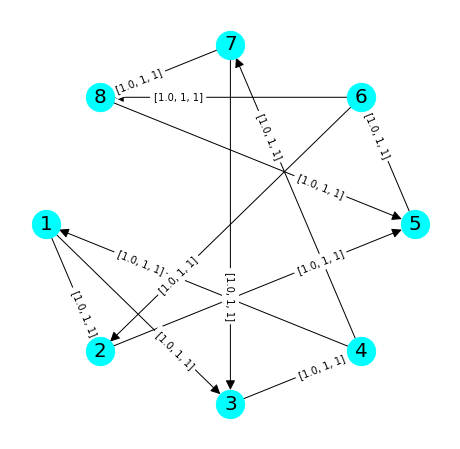

In [8]:
G = nx.DiGraph()
G.add_nodes_from(Nodes)
G.add_edges_from(Arcs)
plt.figure(figsize=(8,8))
edge_labels=nx.draw_networkx_edge_labels(G,edge_labels=CapacityCosts,
    pos=nx.shell_layout(G), label_pos=0.3, font_size=10)
nx.draw_shell(G, with_labels=True, node_color='cyan', node_size=800, 
    font_size=20, arrowsize=20)
print("Network with node labels and capacities/costs on arcs")

Network with supplies and flows for commodity  1
Network with supplies and flows for commodity  2


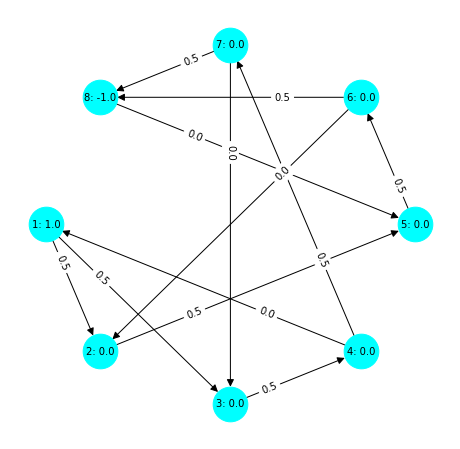

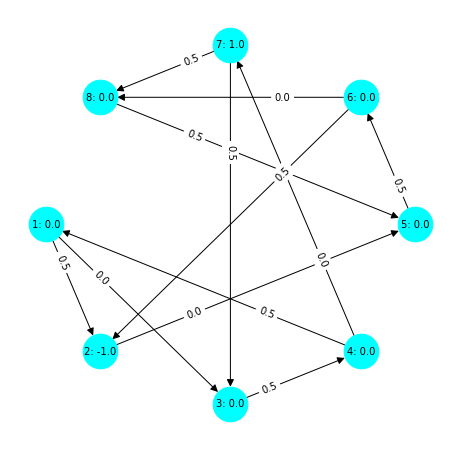

In [10]:
#k=2
for k in Commods:
    Supply1_label={}
    for i in Nodes:
        Supply1_label[i]= str(i)+': '+str(Supplies[i][k-1])

    Flow0=np.zeros(len(Arcs))
    Flow=dict(zip(list(Arcs), Flow0))
    for (i,j) in Arcs: Flow[i,j]= str(round(x[i,j,k].X,4)) 
    H=nx.relabel_nodes(G, Supply1_label)
    plt.figure(figsize=(8,8))
    edge_labels=nx.draw_networkx_edge_labels(H,edge_labels=Flow,
        pos=nx.shell_layout(G), label_pos=0.7, font_size=10)
    nx.draw_shell(H, with_labels=True, node_color='cyan', 
         node_size=1200, font_size=10, arrowsize=15)
    print("Network with supplies and flows for commodity ",k)